In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import networkx as nx

In [4]:
class BSTNode():
    
    def __init__(self, key, value):
        
        self.key = key
        self.val = value
        self.lc = None
        self.rc = None
        self.parent = None

In [5]:
#node0 = BSTNode(5, "dog")
#node1 = BSTNode(2, "cat")
#node2 = BSTNode(7, "llama")
#node3 = BSTNode(1, "anteater")

In [6]:
#node0.lc = node1
#node0.rc = node2
#node1.lc = node3

In [43]:
class BinarySearchTree():
    
    def __init__(self):
        
        self.root = None
    
    def search(self, key):
        return self.search_helper(self.root, key)
        
    def search_helper(self, current_node, key):
        # if our current node is none:
        # stop, we didn't fine the key.
        if current_node is None:
            raise Exception("Key not found")
        # else, if the key of current node matches what we're searching for,
        # return the corresponding value
        elif current_node.key == key:
            return current_node.val
        # else, if the query is smaller than current key,
        # search in left subtree
        elif current_node.key > key:
            return self.search_helper(current_node.lc, key)
        # else, search in the right subtree
        else:
            return self.search_helper(current_node.rc, key)

    def insert(self, key, value):
        self.root = self.insert_helper(self.root, key, value)
        
    def insert_helper(self, current_node, key, value):
        
        # if the current node is None, then we're making a new node
        # and returning that node
        if current_node is None:
            new_node = BSTNode(key, value)
            return new_node
        
        # elif the node isn't None and the key matches
        # replace and return the current node
        elif current_node.key == key:
            current_node.val = value
            return current_node
        # else, recursively insert into left or right subtrees, depending on current.key vs
        # input key
        elif current_node.key < key:
            new_node = self.insert_helper(current_node.rc, key, value)
            new_node.parent = current_node
            current_node.rc = new_node
            return current_node
        else:
            new_node = self.insert_helper(current_node.lc, key, value)
            new_node.parent = current_node
            current_node.lc = new_node
            return current_node
        
    def depth(self):
        return self.depth_helper(self.root)
    
    def depth_helper(self, current_node):
        if current_node is None:
            return 0
        if current_node.lc is None and current_node.rc is None:
            return 0
        elif current_node.lc is None:
            return 1 + self.depth_helper(current_node.rc)
        elif current_node.rc is None:
            return 1 + self.depth_helper(current_node.lc)
        else:
            return 1 + max(self.depth_helper(current_node.lc), self.depth_helper(current_node.rc))
        
        
    def bf(self):
        self.bf_helper(self.root)
     
    # need to calculate the balancing factor
    def bf_helper(self, node):
       
        if node == None:
            pass
            
        else:
            self.bf_helper(node.lc)
            self.bf_helper(node.rc)
            print(node.key, self.depth_helper(node.lc) - self.depth_helper(node.rc))          
        
    
    def delete(self, key):
        self.delete_helper(self.root, key)
        
    def delete_helper(self,current_node,key):
        # if our current node is none:
        # stop, we didn't find the key.
        if current_node is None:
            raise Exception("Key not found")
        # else, if the key of current node matches what we're searching for,
        # return the corresponding value
        elif current_node.key == key:
            
            # zero children
            if current_node.lc is None and current_node.rc is None:
                if current_node == current_node.parent.rc:
                    current_node.parent.rc = None
                else:
                    current_node.parent.lc = None
                    
            # one child - on the right
            elif current_node.lc is None:
                if current_node == current_node.parent.rc:
                    current_node.parent.rc = current_node.rc
                else:
                    current_node.parent.lc = current_node.rc
            
            # one child - on the left
            elif current_node.rc is None:
                if current_node == current_node.parent.rc:
                    current_node.parent.rc = current_node.lc
                else:
                    current_node.parent.lc = current_node.lc
            # two children
            else:
                replacement = self.inorder_successor(current_node)
                rep_parent = replacement.parent
                
                if rep_parent != current_node: 
                    if replacement == rep_parent.rc:
                        rep_parent.rc = None
                    if replacement == rep_parent.lc:
                        rep_parent.lc = None
                
                print(current_node.key, replacement.key, rep_parent.key)
                
                replacement.parent = current_node.parent
                if replacement != current_node.lc:
                    replacement.lc = current_node.lc
                    current_node.lc.parent = replacement
                if replacement != current_node.rc:
                    replacement.rc = current_node.rc
                    current_node.rc.parent = replacement
                
                if current_node == current_node.parent.lc:
                    current_node.parent.lc = replacement
                else:
                    current_node.parent.rc = replacement
            
        # else, if the query is smaller than current key,
        # search in left subtree
        elif current_node.key > key:
            self.delete_helper(current_node.lc, key)
        # else, search in the right subtree
        else:
            self.delete_helper(current_node.rc, key)        
        
    def inorder_successor(self, current_node):
        successor = current_node.rc
        while successor.lc is not None:
            successor = successor.lc
        return successor
    
    def inorder_print(self):
        self.inorder_print_helper(self.root)
    
    def inorder_print_helper(self, current_node):
        if current_node.lc:
            self.inorder_print_helper(current_node.lc)
        print(current_node.key)    
        if current_node.rc:
            self.inorder_print_helper(current_node.rc)
            
    def as_nx_graph(self):
        G = nx.DiGraph()
        self.add_to_graph(G, self.root)
        return G
        
    def add_to_graph(self, graph, current_node):
        if current_node.lc is not None:
            graph.add_edge(current_node.key, current_node.lc.key)
            self.add_to_graph(graph, current_node.lc)
        if current_node.rc is not None:
            graph.add_edge(current_node.key, current_node.rc.key)
            self.add_to_graph(graph, current_node.rc)

In [44]:
tree = BinarySearchTree()

In [45]:
tree.insert(5,'dog')
tree.insert(2,'cat')
tree.insert(3, 'orca')
tree.insert(1,'anteater')
tree.insert(7,'llama')
tree.insert(6, 'chinchilla')

In [27]:
gr = tree.as_nx_graph()

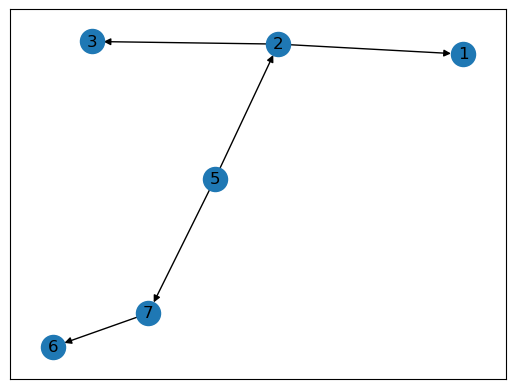

In [28]:
nx.draw_networkx(gr, with_labels=True)

In [29]:
tree.delete(2)

2 3 2


In [30]:
gr = tree.as_nx_graph()

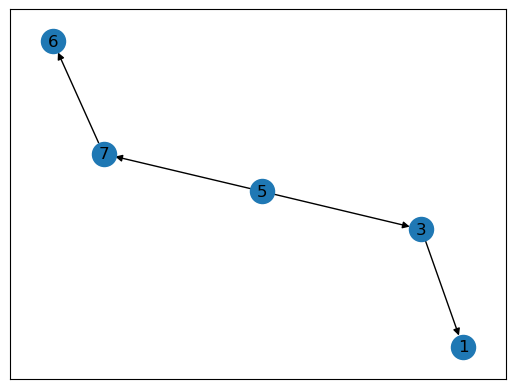

In [33]:
nx.draw_networkx(gr, with_labels=True)

In [34]:
tree.inorder_print()

1
3
5
6
7


In [35]:
tree.root.lc

In [36]:
tree.root.lc.lc.parent

In [37]:
tree.search(7)

'llama'

In [38]:
tree.insert(7, 'bullet_ant')

In [39]:
tree.search(7)

'bullet_ant'

In [40]:
depth_measurements = []
pointer_measurements = []

for i in range(100):
    new_tree = BinarySearchTree()
    random_nums = np.random.randint(low=-1000, high=1001, size=1000)
    
    for number in random_nums:
        new_tree.insert(number, True)
    
    depth_measurements.append(new_tree.depth())
    pointer_measurements.append(new_tree.pointer_follows)

AttributeError: 'BinarySearchTree' object has no attribute 'pointer_follows'

ValueError: x and y must be the same size

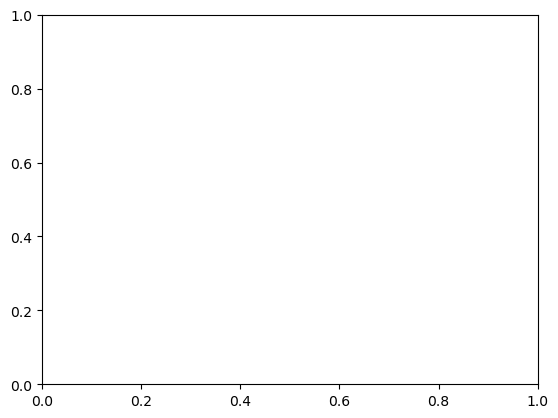

In [41]:
plt.scatter(depth_measurements, pointer_measurements)

In [46]:
depth_measurements = []
pointer_measurements = []

for i in range(100):
    new_tree = BinarySearchTree()
    random_nums = np.sort(np.random.randint(low=-1000, high=1001, size=1000))
    
    for number in random_nums:
        new_tree.insert(number, True)
    
    depth_measurements.append(new_tree.depth())
    pointer_measurements.append(new_tree.pointer_follows)

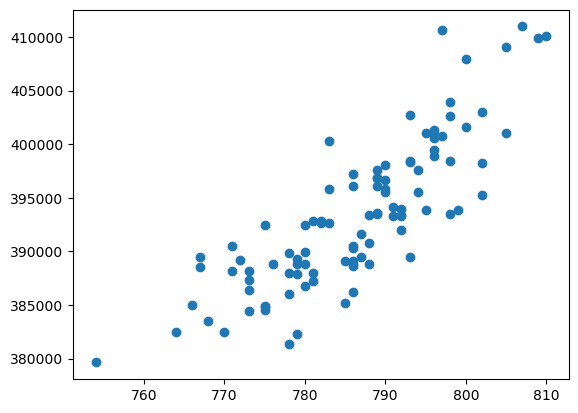

In [47]:
plt.scatter(depth_measurements, pointer_measurements)

In [83]:
p = BSTNode("p", "dog")
a = BSTNode("a", "cat")
b = BSTNode("b", "aardvard")
c = BSTNode("c", "tiger")
x = BSTNode("x", "llama")
y = BSTNode("y", "orca")
z = BSTNode("z", "vaquita")

In [84]:
p.lc = a
a.parent = p

a.lc = b
b.parent = a

a.rc = z
z.parent = a

b.lc = c
c.parent = b

b.rc = y
y.parent = b

c.lc = x
x.parent = c

In [85]:
tree = BinarySearchTree()
tree.root = p

In [86]:
g = tree.as_nx_graph()

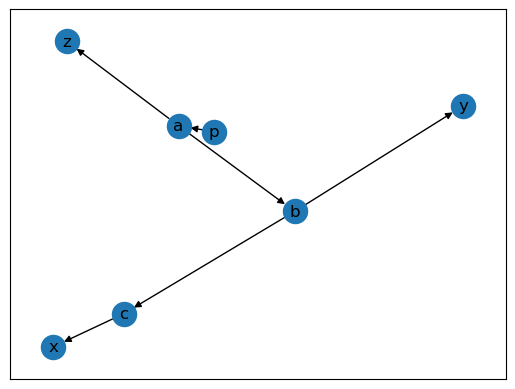

In [87]:
nx.draw_networkx(g, with_labels=True)

In [88]:
tree.bf()

x 0
c 0
y 0
b 1
z 0
a 2
p 3


In [89]:
p.lc = b
b.parent = p
a.lc = y
y.parent = a
b.rc = a
a.parent = b

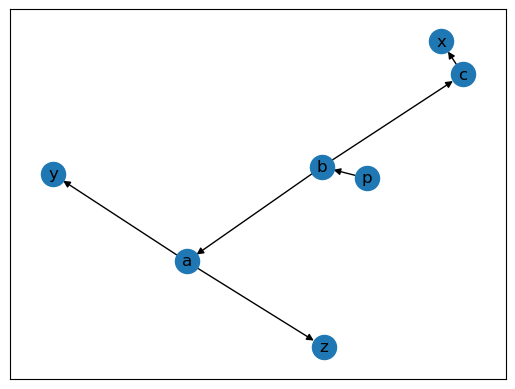

In [90]:
g = tree.as_nx_graph()
nx.draw_networkx(g, with_labels=True)